In [211]:
from finance_utils.electrical.china.spot.discrete.probabilistic_forecast import DiscreteSpot, ProbabilisticDiscreteCurve, SpotNoise
from finance_utils.electrical.china.spot.discrete.testback import TestBack
from finance_utils.electrical.china.spot.rule.recycle import SampleRecycle
import numpy
from data_utils.stochastic_utils.distributions.baseclass import ABCDistribution
from data_utils.stochastic_utils.distributions.basic_distributions import NormalDistribution
from data_utils.stochastic_utils.distributions.nonParametricDistribution import HistogramDist, LogHisDist
from data_utils.stochastic_utils.distributions.discrete.basic import DiscreteDistribution
from matplotlib import pyplot
import tqdm

In [212]:
quantity_min = 0
quantity_max = 30
submitted_min = 0
submitted_max = 30
trigger_rate = 0.05
punishment_rate = 0.5
random_p = 0
random_p_2 = 0.7

In [213]:
dayahead = ProbabilisticDiscreteCurve([
    NormalDistribution(200, 20),
    NormalDistribution(201, 21),
    NormalDistribution(203, 22),
    NormalDistribution(102, 53),
])

realtime = ProbabilisticDiscreteCurve([
    NormalDistribution(200 * 1.2, 20 * 1.5),
    NormalDistribution(201 * 0.8, 21 * 1.2),
    NormalDistribution(203 * 1.5, 22 * 1.3),
    NormalDistribution(102 * 0.9, 53 * 1.1),
])

quantity = ProbabilisticDiscreteCurve([
    NormalDistribution(10, 5),
    NormalDistribution(9, 3),
    NormalDistribution(15, 1),
    NormalDistribution(25, 2),
], domain_min=quantity_min, domain_max=quantity_max)

spot = DiscreteSpot(dayahead, realtime, quantity)

train_testback = TestBack(spot.diff_random_sample(p=random_p, epoch=100, n=100))
q_test = train_testback.differential_evolution__search(
    quantity.value_list, 
    submitted_min=submitted_min,
    submitted_max=submitted_max,
    trigger_rate=trigger_rate, 
    punishment_rate=punishment_rate
)
mpq = quantity.value_list

In [218]:
test_testback = TestBack(spot.diff_random_sample(p=random_p, epoch=100, n=200))
test_testback_2 = TestBack(spot.diff_random_sample(p=random_p_2, epoch=100, n=200))

In [219]:
y_1 = test_testback.testback_yield(
    q_test[0],
    trigger_rate=trigger_rate, punishment_rate=punishment_rate
)
y_2 = test_testback_2.testback_yield(
    q_test[0],
    trigger_rate=trigger_rate, punishment_rate=punishment_rate
)
cy = test_testback.testback_yield(
    mpq,
    trigger_rate=trigger_rate, punishment_rate=punishment_rate
)
cy_2 = test_testback_2.testback_yield(
    mpq,
    trigger_rate=trigger_rate, punishment_rate=punishment_rate
)

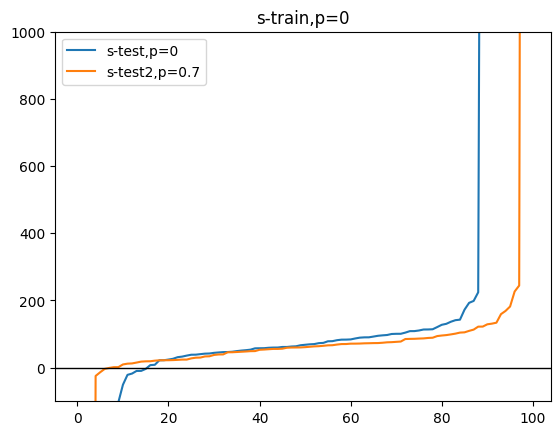

In [222]:
pyplot.plot(numpy.sort(y_1.yield_curve - cy.yield_curve))
pyplot.plot(numpy.sort(y_2.yield_curve - cy_2.yield_curve))
pyplot.ylim(-100, 1000)
pyplot.axhline(0, color='black', linewidth=1)
pyplot.legend(["s-test,p=0","s-test2,p=0.7"])
pyplot.title("s-train,p=0")
pyplot.show()